# **Q4 part 1**

In [ ]:
#https://drive.google.com/file/d/140-3CYiGdnKfgDXQMiXDNH1eMtn3PWe1/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 140-3CYiGdnKfgDXQMiXDNH1eMtn3PWe1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Downloading...
From: https://drive.google.com/uc?id=140-3CYiGdnKfgDXQMiXDNH1eMtn3PWe1
To: /content/covid.csv
100% 258/258 [00:00<00:00, 1.29MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/covid.csv')
data

,Fever,Cough,Breathing issues,Infected
0,No,No,No,No
1,Yes,Yes,Yes,Yes
2,Yes,Yes,No,No
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
5,No,Yes,No,No
6,Yes,No,Yes,Yes
7,Yes,No,Yes,Yes
8,No,Yes,Yes,Yes
9,Yes,Yes,No,Yes


In [ ]:
data_trainset, data_testset = train_test_split(data, test_size=0.2, random_state=7)
#data_testset
#data_trainset

In [ ]:
#labels = data['Infected']
#len(labels), labels.unique(), labels.value_counts()
#p = labels.value_counts() / len(labels)
#-sum(p * np.log2(p))

In [ ]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))


In [ ]:
entropy(data_trainset['Infected'])

0.9456603046006401

# **Information Gain**

In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        #display(subset)
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

[information_gain(data_trainset, feature, 'Infected') for feature in data_trainset.iloc[:, :-1].columns]#iloc[:, :-1] برای اینه که خود تارگت رو حساب نکنه

[0.2741310366085653, 0.02368671823006807, 0.61751117056093]

In [ ]:
#information_gain(data, 'Breathing issues', 'Infected')

In [ ]:
np.argmax([information_gain(data_trainset, feature, 'Infected') for feature in data_trainset.iloc[:, :-1].columns])

2

# **2 is Breathing issues so Breathing issues be selected**

# **creating Node:**

In [ ]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):# این تابع کمک میکنه که خیلی تر و تمیز خروجی بده و بهمون یه سری عدد (که آدرسن) نده
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
            #وقتی دیسیژن نود داشته باشیم حتما چیلدرن نود هم داریم
        else:
            return f'LeafNode(label="{self.label}")'

Node(label='Cough')
# Node(label='yes')
#زمانی که دیسیژن نود داشته باشیم حالت اون فیچر میشه و زمانی که لیف نود داشته باشیم حالت نان میمونه
#پس ما از بیرون به کلاس نود خودمون فقط یا فیچر میدیم یا لیبل میدیم

LeafNode(label="Cough")

# **Decision Tree**

In [ ]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:#برای زمانی که به برگ رسیدیم و دیگه همه یک وضعیت دارند
        return Node(label=data[target].iloc[0])# همه وضعیت ها مشابه همند و یکی شونو برداریم و به کلاس نود بدیم کافیه

    features = data.drop(target, axis=1).columns# ازش خود تارگت رو حذف کنیم
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)#میخواهیم اندیسشو بهمون بده تا بریم در دیتا با اون کار کنیم
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)#در ساب ست دیگه به خود اون ستون نیازی نداریم
        display(subset)

        node.children[value] = make_tree(subset, target)# فرزندان را ثبت کنیم همونی که داخل کلاس نود خالی گذاشته بودیمش

    return node

In [ ]:
tree = make_tree(data_trainset, 'Infected')
tree

,Fever,Cough,Infected
5,No,Yes,No
0,No,No,No
13,Yes,Yes,No
10,No,Yes,No
9,Yes,Yes,Yes


,Cough,Infected
5,Yes,No
0,No,No
10,Yes,No


,Cough,Infected
13,Yes,No
9,Yes,Yes


,Infected
13,No
9,Yes


,Fever,Cough,Infected
1,Yes,Yes,Yes
8,No,Yes,Yes
7,Yes,No,Yes
3,Yes,No,Yes
6,Yes,No,Yes
4,Yes,Yes,Yes


DecisionNode(feature="Breathing issues", children={'No': DecisionNode(feature="Fever", children={'No': LeafNode(label="No"), 'Yes': DecisionNode(feature="Cough", children={'Yes': LeafNode(label="No")})}), 'Yes': LeafNode(label="Yes")})

In [ ]:
tree.feature

'Breathing issues'

# **Evaluation**

In [ ]:
data_testset

,Fever,Cough,Breathing issues,Infected
12,No,Yes,Yes,No
11,No,Yes,Yes,Yes
2,Yes,Yes,No,No


In [ ]:
def predict(node, sample):
    if node.feature is None:
        return node.label

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        return node.label

MyPredict = [predict(tree, sample) for _, sample in data_testset.iterrows()]
MyPredict

['Yes', 'Yes', 'No']

In [ ]:
# Assuming data_testset['Infected'] is a Pandas Series
infected_column = data_testset['Infected']

# Convert the Pandas Series to a list
infected_list = infected_column.tolist()

# Print the resulting list
print(infected_list)

['No', 'Yes', 'No']


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(infected_list, MyPredict)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


# **Visualization**

In [ ]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

# Q4 Part 2

In [ ]:
#https://drive.google.com/file/d/1UUYlwppav-QeJwl7T_4x3CrVdcabfQcM/view?usp=sharing

In [19]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1UUYlwppav-QeJwl7T_4x3CrVdcabfQcM

Downloading...
From: https://drive.google.com/uc?id=1UUYlwppav-QeJwl7T_4x3CrVdcabfQcM
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 16.9MB/s]


In [20]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data = pd.read_csv('/content/drug200.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [22]:
l1 = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l1.fit_transform(data[i])

In [23]:
data.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


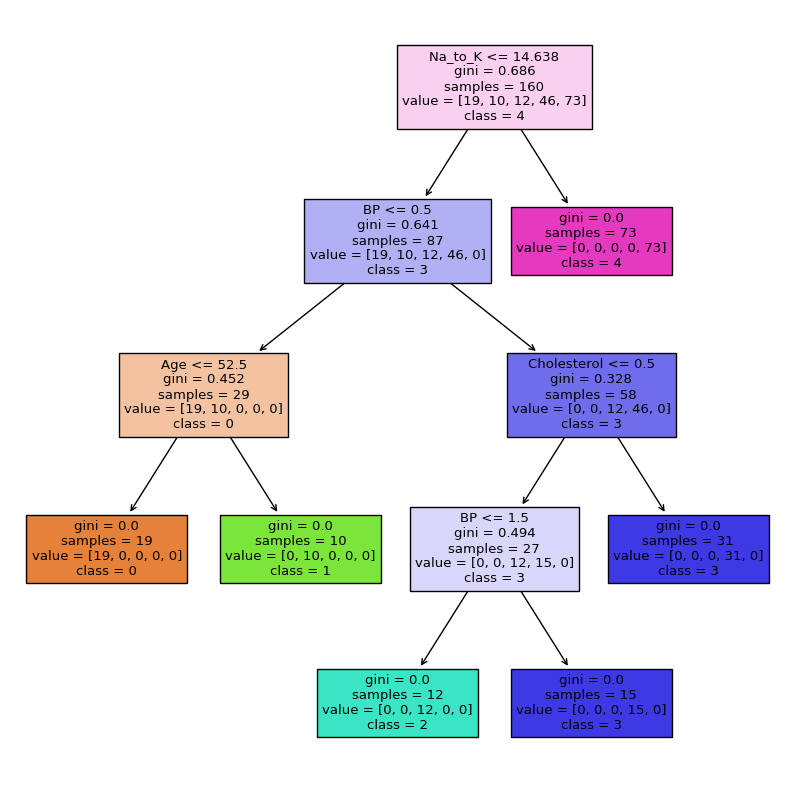

In [24]:
import matplotlib.pyplot as plt
X = data.drop('Drug', axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
clf = tree.DecisionTreeClassifier(criterion ='gini' ,max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Convert class names to strings
class_names = list(map(str, clf.classes_))
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
y_hat = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)
# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")
#clf.score(X_test, y_test)
#clf.predict_proba(X_test)

Accuracy: 95.00%


In [27]:
i = 3
print (X_test.iloc[[i]])
decision_path = clf.decision_path(X_test.iloc[[i]])
decision_path.toarray()
#میگه که برای اون سمپل چه مسیری طی شده و کدوم نود ها اثر گذار بودن و کدوما نبودن

    Age  Sex  BP  Cholesterol  Na_to_K
11   34    0   0            1   19.199


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [28]:
i = 15
print (X_test.iloc[[i]])
decision_path = clf.decision_path(X_test.iloc[[i]])
decision_path.toarray()

     Age  Sex  BP  Cholesterol  Na_to_K
155   49    1   1            0   10.537


array([[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]])

# Q4 Part 3

In [1]:
#https://drive.google.com/file/d/1JsT9ySKGHAX48-YBGKXv6YoQLsoie_hv/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1JsT9ySKGHAX48-YBGKXv6YoQLsoie_hv

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1JsT9ySKGHAX48-YBGKXv6YoQLsoie_hv
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 79.3MB/s]


In [29]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data = pd.read_csv('/content/Life Expectancy Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [30]:
data = data.dropna(how='any')

In [31]:
l1 = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l1.fit_transform(data[i])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int64  
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int64  
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [34]:
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']


In [35]:
y.shape,X.shape

((1649,), (1649, 21))

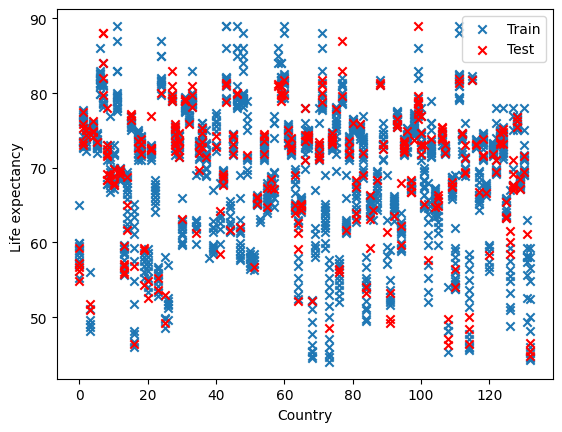

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Selecting the first feature for the scatter plot
feature_for_plot = X.columns[0]

x_train, x_test, y_train, y_test = train_test_split(X[feature_for_plot], y, test_size=0.2, random_state=7)

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.xlabel(feature_for_plot)
plt.ylabel('Life expectancy ')
plt.legend(['Train', 'Test'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


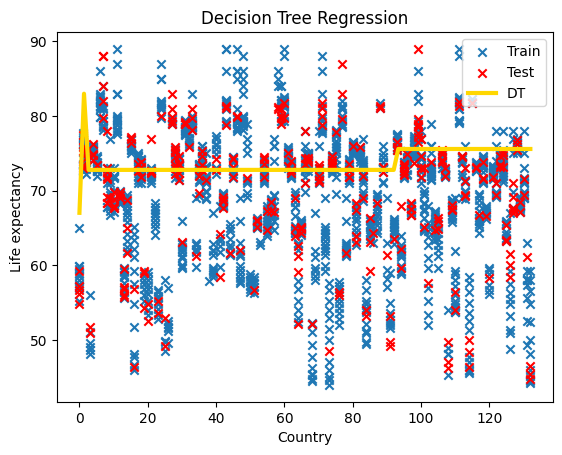

In [72]:
from sklearn.model_selection import GridSearchCV

# Assuming 'data' is your DataFrame
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

best_score = -np.inf
# Define the parameter grids
ccp_alpha_values = np.linspace(0, 0.005, num=100)
max_depth_values = range(1, 30)

for ccp_alpha in ccp_alpha_values:
    for max_depth in max_depth_values:
        reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha, max_depth=max_depth, random_state=7)
        reg.fit(x_train, y_train)
        score = reg.score(x_test, y_test)

        if score > best_score:
            best_score = score
            best_ccp_alpha = ccp_alpha
            best_max_depth = max_depth

reg = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha, max_depth=best_max_depth, random_state=7)
reg.fit(x_train, y_train)
# Generate data points for plotting
xp = np.linspace(X[feature_of_interest].min(), X[feature_of_interest].max(), 100)  # Use linspace for a 1D array
xp = xp.reshape(-1, 1)  # Reshape to a column vector
yp = reg.predict(np.column_stack([xp] * X.shape[1]))  # Repeat the array to match the number of features

# Flatten x_train and x_test for scatter plots
plt.scatter(x_train[feature_of_interest].values.flatten(), y_train, marker='x')
plt.scatter(x_test[feature_of_interest].values.flatten(), y_test, c='r', marker='x')
plt.plot(xp, yp, color='gold', linewidth=3)

plt.legend(['Train', 'Test', 'DT'])
plt.xlabel(feature_of_interest)
plt.ylabel('Life expectancy')
plt.title('Decision Tree Regression')
plt.show()


In [73]:
reg.score(x_train, y_train), reg.score(x_test, y_test)

(0.9903073081925604, 0.9264743641874817)

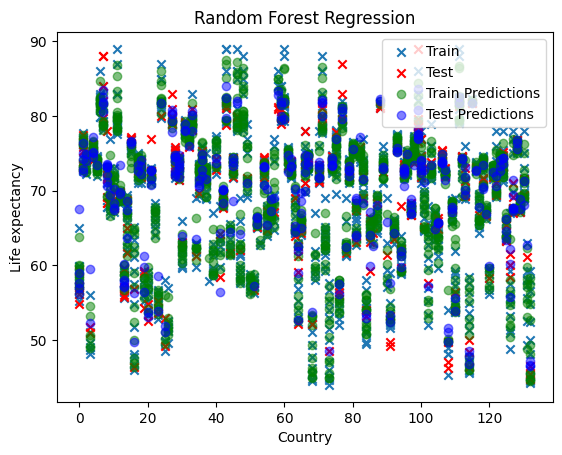

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=7)

# Train the model
rf_reg.fit(x_train, y_train)

# Predictions
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

# Plotting
plt.scatter(x_train[feature_of_interest].values.flatten(), y_train, marker='x')
plt.scatter(x_test[feature_of_interest].values.flatten(), y_test, c='r', marker='x')
plt.scatter(x_train[feature_of_interest].values.flatten(), y_train_pred, marker='o', c='green', alpha=0.5)
plt.scatter(x_test[feature_of_interest].values.flatten(), y_test_pred, marker='o', c='blue', alpha=0.5)

plt.legend(['Train', 'Test', 'Train Predictions', 'Test Predictions'])
plt.xlabel(feature_of_interest)
plt.ylabel('Life expectancy')
plt.title('Random Forest Regression')
plt.show()


In [65]:
rf_reg.score(x_train, y_train), rf_reg.score(x_test, y_test)

(0.9941582145255462, 0.9592518276515615)